In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

import quadrotor
import math

In [2]:
m = 0.6  
r = 0.2
I = 0.15
g = 9.81
dt = 0.01

In [3]:
def get_linearization(z, u):
    T = z[4]
    u1 = u[0]
    u2 = u[0]
    A = np.array([[1,dt,0,0,0,0],[0,1,0,0,-(dt*(u1+u2)*math.cos(T))/m,0],[0,0,1,dt,0,0],[0,0,0,1,-(dt*(u1+u2)*math.sin(T))/m,0],[0,0,0,0,1,dt],[0,0,0,0,0,1]])
    B = np.array([[0,0],[-(dt*math.sin(T))/m,-(dt*math.sin(T))/m],[0,0],[(dt*math.cos(T))/m,(dt*math.cos(T))/m],[0,0],[(dt*r)/I,-(dt*r)/I]])
    return A,B


In [4]:
def solve_LQR(state,i):
    N=1000
    #Q	Numpy Array of size ns x ns
    #R	Numpy Array of size nc x nc
    Q= np.identity(6)*10000
    R= np.identity(2)*0.0001
    
    list_of_P = [0 for x in range(N+1) ]
    list_of_K = [0 for x in range(N)]
    list_of_P[-1]=Q
    A,B = get_linearization(state, np.array([m*g/2,m*g/2]))
    back_r = [i for i in range(N)]
    back_r.reverse()
    Bt = np.matrix.transpose(B)
    At = np.matrix.transpose(A)
    for n in back_r:
        list_of_K[n] = -(np.linalg.inv(Bt @ list_of_P[n+1] @ B + R) @ (Bt) @ list_of_P[n+1] @ A)
        list_of_P[n] = Q + At @ list_of_P[n+1] @ A + At @ list_of_P[n+1] @ B @ list_of_K[n]
        if n<999 :
            if np.unique(np.round(list_of_K[n],3) == np.round(list_of_K[n+1],3))[0]:
                return list_of_K[n]@state

In [5]:
# we can now simulate for a given number of time steps - here we do 10 seconds
horizon_length = 1000
z0 = np.zeros([quadrotor.NUMBER_STATES,])
t, state, u = quadrotor.simulate(z0, solve_LQR, horizon_length, disturbance = True)

<IPython.core.display.Javascript object>


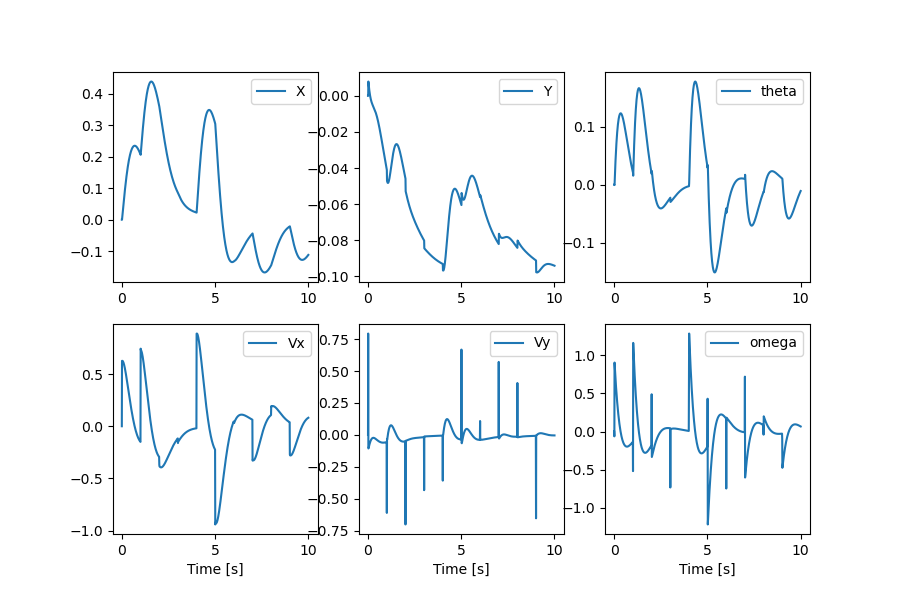

<IPython.core.display.Javascript object>


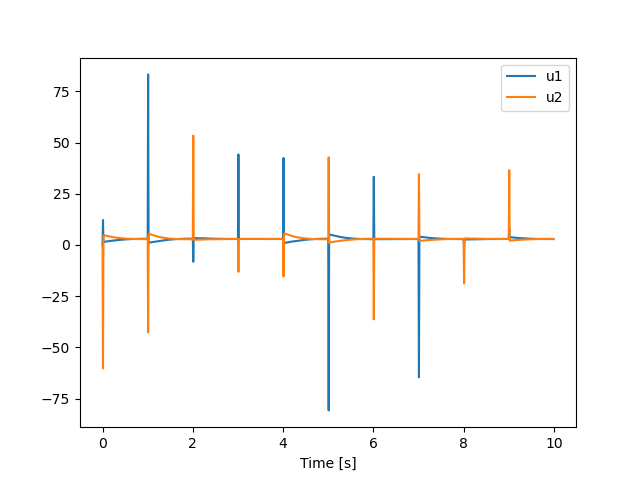

Text(0.5, 0, 'Time [s]')

In [6]:
# we can plot the results
plt.figure(figsize=[9,6])

plt.subplot(2,3,1)
plt.plot(t, state[0,:])
plt.legend(['X'])

plt.subplot(2,3,2)
plt.plot(t, state[2,:])
plt.legend(['Y'])

plt.subplot(2,3,3)
plt.plot(t, state[4,:])
plt.legend(["theta"])

plt.subplot(2,3,4)
plt.plot(t, state[1,:])
plt.legend(['Vx'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state[3,:])
plt.legend(['Vy'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state[5,:])
plt.legend(['omega'])
plt.xlabel('Time [s]')

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1', 'u2'])
plt.xlabel('Time [s]')

In [7]:
# now we can also create an animation
quadrotor.animate_robot(state, u)

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAYHltZGF0AAACoQYF//+d
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2MSAtIEguMjY0L01QRUctNCBBVkMgY29kZWMg
LSBDb3B5bGVmdCAyMDAzLTIwMjAgLSBodHRwOi8vd3d3LnZpZGVvbGFuLm9yZy94MjY0Lmh0bWwg
LSBvcHRpb25zOiBjYWJhYz0xIHJlZj0zIGRlYmxvY2s9MTowOjAgYW5hbHlzZT0weDM6MHgxMTMg
bWU9aGV4IHN1Ym1lPTcgcHN5PTEgcHN5X3JkPTEuMDA6MC4wMCBtaXhlZF9yZWY9MSBtZV9yYW5n
ZT0xNiBjaHJvbWFfbWU9MSB0cmVsbGlzPTEgOHg4ZGN0PTEgY3FtPTAgZGVhZHpvbmU9MjEsMTEg
ZmFzdF9wc2tpcD0xIGNocm9tYV9xcF9vZmZzZXQ9LTIgdGhyZWFkcz0xOCBsb29rYWhlYWRfdGhy
ZWFkcz0zIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFjZWQ9MCBibHVy
YXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJhbWlkPTIgYl9h
ZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdlaWdodHA9MiBr
ZXlpbnQ9MjUwIGtleWludF9taW49MTAgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVzaD0wIHJjX2xv
b2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBxcG1pbj0wIHFw
bWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAABHKZYiEABH//veIHzLL
afk613IR560urR9Q7kZxXqS9/iAAAAMAAAMAAAMACpJYniKH8XjN/AAAAwAAt4AXsAwgCqgMKj6I
dndnTzAIiR6+OnDbVkTjpPexGHLjoXY30hkXEhSE9kEKIJNbrApCI4G73ihHZi4T1K1iog5Wc0p6
pLHThCwCmnYhSqYpYbTo2n5tZjl9Sersc3rmxTCU1aG5ejWlf2ZiBPtJ6vuZEf6FCWPekrjf3iOx
g9nYeAC3//ekaJ6Uup8pEnX74AtF5miPCXmGYp1VgIlMhblKE1f5XLlxb1HUXmuG+fEgDCAJNggr
SWMoFVS8OFpaDDMvSO64pmzh6vHDoKtfmcA4i12uUsh7rwNZe/BI7LdbaaCmFlaKG6p3WlZZBOgL
c6Xh6KGqBk+DXTIvzmnGdaE/vYVZrpQqE5tWlH1wLzpsCVXhaMhwyKlIHYXCzI57hN1GXk5AJs78
kL3L0uFd6c/RFa7OFV/kuFKHj+kqM4DkzP7PBgAC6AAADAn+uXo8j5J0TvKiQM4nLDD+XAg9NeD6
W8cce2l/FR62IVTJaZmpZXtWP3P3BP8Aty1kv38ceunYStFyA/05L8hPnpct8GwCWlzTtbCvTReE
HJz1a5gtpTABNPy+/tCuvMR6WgJvSsNn61ezHOjGNwqbjeiH0YSDdQMKznomzDwO9Guv8vX0Axnn
UksKqHboJ5g5oIo877MWl4BrV0RlKw0IFwXY/uC1/NrVms+YIRkAbT20GeVQYPen6zGAVf2KCyuv
i/o7vB46nPxSm/qMgeMjM/laohkgNM0SBaFCXrzNuC+3snatr9vBmkzqlolCtOpEXoijNRPf2sX0
Sg8AuZkqAHN/k60MTNXn1Sra7J2rdNwCn6l/5a8jeEBwuzeTuyDMFytRDj+ei/wYryU00dNQJ4KR
pnFfiJuXJ8LyOU832g9SwiY/rim8AAADAAADAAADAAAJUchT685ptYvFSJ5vRPBnShcaoVlbv1fv
nAdJyQ9/h4Y2MNTtxdM5/2ubtKfAQmv/f4fxiuVos5NHnHCOA54iXCHkF2+KCSvxjH837gD8r5Lg
vudrJ1j54JkDGsG6y6lnuNxvCAHUYC1dFOeeXj/OnDH3oRVc0spfxoKmrdjIb21n9P9d7r4TN8Ob
HE4fjwmtp43o4qyugzEbdTaOF22JNee+dRYXAayjEWwaPQmq8hmvqUMjwJs3aGt3ALm+CrSl9T5E
yKbw2ErxZBytHO+1/8hqthoH2mJIBqiCSA3Tc3rB/5FaTBrknzyEbXMuyUY/6kdM/z2vNwUquAPk
8XEAxFgacBdsgG2GFtDMYAY8/0fs4L8Z204YrgqedjfPsHcmd+kYEcaLegD5YX9qgAAB4Db/CAAP
aKxckAGkxOxwAqZjkRHr6sqHKLkLbhvTk9IUHw+TSCCiGYjFxmH7GWAoNFjyaUKodLvESboABE4T
Z0nN+XYOql3Y0OxLmu4Ws5YZk03JudmCY9sFOl8eD1bZTEn5mdHecgtFcOccvbjhiKqbmGDolGUL
f/hmh37YrqMImNsGktimQWyTeiDxgPgoXi/wyb3dTSzhD9KL0jpZOlvOhjJ/YAsW9PM/qwaXVKA+
q32AzG61Bw7+M9SV6Dx3P8Khh0UH8iEUSZ2UBz3uZVehfl1dWxuIJGaSphpLz0nyWUSVuktaY+2C
yR5fivvbdlj7yl0CJmZ3x669rOgNcHKYni3ZyjrZBIG4jI4+ulIcvUy9+kK5sp5OGtvjrMVIHzkC
ze9DrpJDDMbaD+tI06aHMrWbEEO20sU5xFWMypirxPu/i9/x3QEKK7zbBAbohpDnRrjyGztkvsCy
D8A2zMRBO+TJ6L9XUERaSq0iej2Umm/Mgm1JO4wGw+16ugAABYg3xIAAC9lnE8AGT8jqZzewMEuV
/Gyq57kkDbFYB/aemsU/+mfPjylmwPhWT9yK6LkG9rj3PEY4m8tfK/rgf0Y12Gq6h18U0/cxMG0D
CHFCPqLWKKnL+EcEB2UEU0HP4KzvPZxu4yDSQ1s5WjcCM9p58HLjsvn7XDG4XqumOps1JaQ6Rpce
1hkqmulHCupbOTAqSlfTuhoz3yEFF+Xamlp6zpUnXwwyIBvZoGHLZDUf2HlezVBb34DBTTS5qF6V
6sDxohssXw0KiTx3ASVlu2RiHM+rlAcXDx7Tu4pjgPHmQDIFQ09fszRRNiU7LrIWajAIcTMoO23A
fqbD+2H3+Q00mOVDZRbYuimB2kTIa7lH/SY1LnhHNWNLitsWT48DCz3D0lS6KmKGVl8MT+kCkTHy
HR/VUgf7UxphHRAxyNJwfYoKlI1n9HTcgX2XQBuSz1akkc36RXB1PXRiOEcVPl2GmlEoxpZteDfA
sjsgdWTYf5UqGuh8OJsKaqFbF/Pmgurdo5Xg8exSi0LCdQvtbXR3U0jPhvg6AMi/QGhj1uDb7QgH
YN8rFC1vS8P+A/xEjNJD3wBCDvNi2kzh/dXtUB4MejLi2HdIYyP1fXsxCfvIPT1TqH+11/80IWjo
iPGu32uOVWFwJc0gcGoD/JX6495O7BfOvoX2K2UMDjU8RVgIe1sEmwvuW5wE558XKrbKKnHGkQw3
4BL66/6AzzyfcE2On4yCNOOlYWhAcSYAC+Z9sNbyEAAAAwAADU/ZXnSe6GEvrbYV12trc3f6wkzX
T1BDZbuR+iTEoaSM8cnOFUMGwgYku8ojZ729kkwYerL1AQ5vDuqE53Oh285NW1eXL6GDSUTEWKis
n0sIqr9beDsgmtraG/1Knw6W/werjU0g6A2lH3SCqkDP9cY3MOGMXvS32GNuh6SfqGW9Kko3n1N9
z0niR/kSTHRsWcPeDPAg4v3xMgFlUtWEQZqfXqaoXIrq1TS4uWc/AHY8LuHwlJ4EJ2wIXfZZgGQ1
zvgJzv7rOxunUxTeeWpz3